In [1]:
pip install pandas numpy scikit-learn matplotlib joblib


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 2.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/8.0 MB 2.7 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.0 MB 2.8 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.0 MB 2.8 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.0 MB 3.1 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.0 MB 3.4 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.0 MB 3.6 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.0 MB 3.6 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.0 MB 3.7 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.0 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------- ---


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# 📌Load the dataset
file_path = "HousingData.csv"  
df = pd.read_csv(r"D:\BLDEACET\internship\ShadowFox\task1\HousingData.csv")

#  Handle missing values by replacing them with the median
df.fillna(df.median(), inplace=True)

#  Define features (X) and target variable (y)
X = df.drop(columns=["MEDV"])  # Features (excluding house price)
y = df["MEDV"]  # Target variable (house price)

#  Split data into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Standardize the data (Important for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
#  Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

#  Make predictions using Linear Regression
y_pred_lr = lr_model.predict(X_test_scaled)

# 📌Evaluate the Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("🔹 Linear Regression Results:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")


🔹 Linear Regression Results:
MAE: 3.15
RMSE: 5.00
R² Score: 0.66


In [20]:
#  Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

#  Make predictions using Linear Regression
y_pred_lr = lr_model.predict(X_test_scaled)

# 📌Evaluate the Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("🔹 Linear Regression Results:")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")


🔹 Linear Regression Results:
MAE: 3.15
RMSE: 5.00
R² Score: 0.66


In [21]:
#  Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#  Make predictions using Random Forest
y_pred_rf = rf_model.predict(X_test)

#  Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\n🔹 Random Forest Results:")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")



🔹 Random Forest Results:
MAE: 2.06
RMSE: 2.87
R² Score: 0.89


In [22]:
#  Compare R² Scores of Both Models
print("\n🔹 Model Comparison:")
print(f"Linear Regression R² Score: {r2_lr:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")

#  Choose the best model
best_model = "Random Forest" if r2_rf > r2_lr else "Linear Regression"
print(f"\n Best Performing Model: {best_model}")



🔹 Model Comparison:
Linear Regression R² Score: 0.66
Random Forest R² Score: 0.89

 Best Performing Model: Random Forest


In [23]:
# 📌 Save the trained Random Forest model for future use
joblib.dump(rf_model, "house_price_model.pkl")
print("\n Model saved as 'house_price_model.pkl'.")

#  To load and use the saved model later:
# loaded_model = joblib.load("house_price_model.pkl")
# prediction = loaded_model.predict(X_test)



 Model saved as 'house_price_model.pkl'.


In [24]:
#  Predict house price for new input data
new_data = [[0.02, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.0900, 1, 296, 15.3, 396.9, 4.98]]  # Example input
new_pred = rf_model.predict(new_data)

print(f"\n Predicted House Price: {new_pred[0]:.2f}")



 Predicted House Price: 28.35


C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


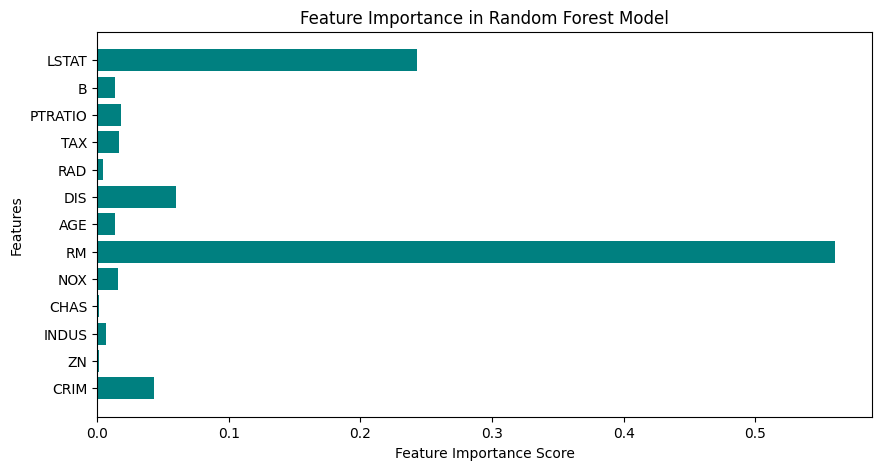

In [25]:
# Identify the most important features in predicting house prices
feature_importance = rf_model.feature_importances_
feature_names = X.columns

#  Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_names, feature_importance, color='teal')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()


In [26]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearch
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}


In [27]:
import joblib
joblib.dump(rf_model, "house_price_model.pkl")
print(" Model saved as 'house_price_model.pkl'.")


 Model saved as 'house_price_model.pkl'.


In [18]:
import joblib
import pandas as pd

#  Load the trained model
rf_model = joblib.load("house_price_model.pkl")

#  Define feature names (same as in training)
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

#  New house data for prediction
new_data = [[0.02, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.0900, 1, 296, 15.3, 396.9, 4.98]]

#  Convert to DataFrame with feature names
new_data_df = pd.DataFrame(new_data, columns=feature_names)

#  Predict house price
predicted_price = rf_model.predict(new_data_df)
print(f"💰 Predicted House Price: {predicted_price[0]:.2f}")


💰 Predicted House Price: 28.35
